<a href="https://colab.research.google.com/github/Greta-gerasimov/PyT/blob/L2_feed_f/3_part_SDG_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [2]:
FOLDER_PATH = 'C:/Users/Kate/Desktop/PT/'
train_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

100%|██████████| 170498071/170498071 [00:05<00:00, 31039161.56it/s]


Extracting C:/Users/Kate/Desktop/PT/cifar-10-python.tar.gz to C:/Users/Kate/Desktop/PT/
torch.Size([3, 32, 32])
6


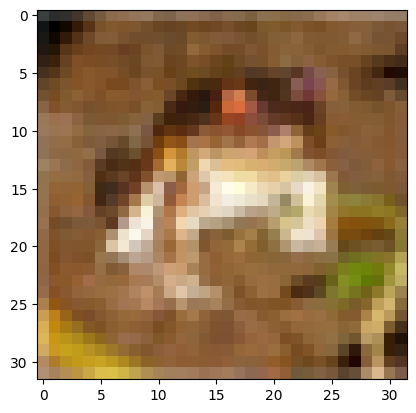

In [3]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [5]:
test_dataset = torchvision.datasets.CIFAR10(root=FOLDER_PATH,
                                            train=False,
                                            download=True,
                                            transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [7]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

In [8]:

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
       # x = F.softmax(x)
        return x

    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 256, 10)

##optimizator - SDG
epochs = 100


In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [10]:
from tqdm import tqdm

In [11]:
num_epochs = 100
for epoch in tqdm(range(num_epochs)):
    running_loss = 0.0



    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/30 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.343
[1,   601] loss: 0.333


  3%|▎         | 1/30 [00:36<17:46, 36.79s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.306
[2,   601] loss: 0.296


  7%|▋         | 2/30 [01:10<16:17, 34.93s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.285
[3,   601] loss: 0.281


 10%|█         | 3/30 [01:42<15:13, 33.85s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.275
[4,   601] loss: 0.270


 13%|█▎        | 4/30 [02:15<14:26, 33.32s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.265
[5,   601] loss: 0.261


 17%|█▋        | 5/30 [02:49<13:56, 33.46s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.256
[6,   601] loss: 0.256


 20%|██        | 6/30 [03:21<13:17, 33.22s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.250
[7,   601] loss: 0.248


 23%|██▎       | 7/30 [03:55<12:46, 33.32s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.244
[8,   601] loss: 0.242


 27%|██▋       | 8/30 [04:29<12:15, 33.43s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.241
[9,   601] loss: 0.236


 30%|███       | 9/30 [05:02<11:40, 33.35s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.233
[10,   601] loss: 0.231


 33%|███▎      | 10/30 [05:35<11:03, 33.18s/it]

[11,     1] loss: 0.001
[11,   301] loss: 0.229
[11,   601] loss: 0.226


 37%|███▋      | 11/30 [06:07<10:28, 33.06s/it]

[12,     1] loss: 0.001
[12,   301] loss: 0.224
[12,   601] loss: 0.223


 40%|████      | 12/30 [06:43<10:06, 33.70s/it]

[13,     1] loss: 0.001
[13,   301] loss: 0.220
[13,   601] loss: 0.219


 43%|████▎     | 13/30 [07:17<09:35, 33.83s/it]

[14,     1] loss: 0.001
[14,   301] loss: 0.216
[14,   601] loss: 0.216


 47%|████▋     | 14/30 [07:50<09:00, 33.79s/it]

[15,     1] loss: 0.001
[15,   301] loss: 0.212
[15,   601] loss: 0.213


 50%|█████     | 15/30 [08:24<08:28, 33.87s/it]

[16,     1] loss: 0.001
[16,   301] loss: 0.210
[16,   601] loss: 0.208


 53%|█████▎    | 16/30 [08:59<07:55, 33.94s/it]

[17,     1] loss: 0.001
[17,   301] loss: 0.205
[17,   601] loss: 0.205


 57%|█████▋    | 17/30 [09:32<07:19, 33.79s/it]

[18,     1] loss: 0.001
[18,   301] loss: 0.204
[18,   601] loss: 0.203


 60%|██████    | 18/30 [10:07<06:49, 34.13s/it]

[19,     1] loss: 0.001
[19,   301] loss: 0.198
[19,   601] loss: 0.201


 63%|██████▎   | 19/30 [10:43<06:20, 34.60s/it]

[20,     1] loss: 0.001
[20,   301] loss: 0.197
[20,   601] loss: 0.198


 67%|██████▋   | 20/30 [11:22<05:59, 35.98s/it]

[21,     1] loss: 0.001
[21,   301] loss: 0.195
[21,   601] loss: 0.195


 70%|███████   | 21/30 [11:56<05:20, 35.56s/it]

[22,     1] loss: 0.001
[22,   301] loss: 0.193
[22,   601] loss: 0.193


 73%|███████▎  | 22/30 [12:31<04:41, 35.19s/it]

[23,     1] loss: 0.001
[23,   301] loss: 0.191
[23,   601] loss: 0.189


 77%|███████▋  | 23/30 [13:04<04:03, 34.76s/it]

[24,     1] loss: 0.001
[24,   301] loss: 0.187
[24,   601] loss: 0.188


 80%|████████  | 24/30 [13:39<03:27, 34.62s/it]

[25,     1] loss: 0.001
[25,   301] loss: 0.184
[25,   601] loss: 0.187


 83%|████████▎ | 25/30 [14:14<02:53, 34.67s/it]

[26,     1] loss: 0.001
[26,   301] loss: 0.183
[26,   601] loss: 0.183


 87%|████████▋ | 26/30 [14:49<02:19, 34.90s/it]

[27,     1] loss: 0.001
[27,   301] loss: 0.181
[27,   601] loss: 0.179


 90%|█████████ | 27/30 [15:23<01:44, 34.71s/it]

[28,     1] loss: 0.001
[28,   301] loss: 0.177
[28,   601] loss: 0.179


 93%|█████████▎| 28/30 [15:58<01:09, 34.68s/it]

[29,     1] loss: 0.001
[29,   301] loss: 0.178
[29,   601] loss: 0.175


 97%|█████████▋| 29/30 [16:32<00:34, 34.54s/it]

[30,     1] loss: 0.000
[30,   301] loss: 0.174
[30,   601] loss: 0.173


100%|██████████| 30/30 [17:05<00:00, 34.19s/it]

Training is finished!


In [12]:
PATH_WEIGHTS = 'C:/Users/Kate/Desktop/PT/cifar_net_weight.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [13]:
print ('Model state dict:')
for param in net.state_dict():
    print(param, '\t', net.state_dict())

Model state dict:
fc1.weight 	 OrderedDict([('fc1.weight', tensor([[ 0.0111, -0.0082, -0.0085,  ...,  0.0066,  0.0061, -0.0060],
        [ 0.0129,  0.0103,  0.0149,  ..., -0.0092, -0.0004,  0.0147],
        [-0.0100, -0.0132, -0.0184,  ...,  0.0042, -0.0006,  0.0060],
        ...,
        [-0.0227,  0.0054, -0.0113,  ...,  0.0008, -0.0013, -0.0010],
        [-0.0104, -0.0007, -0.0004,  ...,  0.0081, -0.0177, -0.0098],
        [-0.0039,  0.0023,  0.0027,  ...,  0.0165, -0.0037,  0.0021]])), ('fc1.bias', tensor([ 0.0181, -0.0065,  0.0050,  ...,  0.0131,  0.0076, -0.0350])), ('fc2.weight', tensor([[ 0.0088,  0.0159, -0.0135,  ...,  0.0214,  0.0010,  0.0112],
        [ 0.0194,  0.0012, -0.0181,  ...,  0.0305,  0.0291,  0.0043],
        [ 0.0075, -0.0280, -0.0306,  ...,  0.0263, -0.0199, -0.0190],
        ...,
        [ 0.0136,  0.0046,  0.0174,  ...,  0.0180,  0.0260,  0.0220],
        [ 0.0116,  0.0150,  0.0010,  ...,  0.0252,  0.0192,  0.0259],
        [-0.0160,  0.0198, -0.0134,  ...,  

In [14]:
net = Net(3072, 256, 10)
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (fc1): Linear(in_features=3072, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=10, bias=True)
)

In [15]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

GroundTruth:  cat ship ship plane frog frog car frog


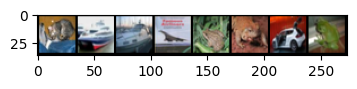

In [16]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(4, 2))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [17]:
net.predict(images);

<ipython-input-8-99276d73dfec>:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


In [18]:
_, imgs_predicted = torch.max(outputs, 1)
imgs_predicted

tensor([3, 9, 0, 4, 4, 6, 3, 4])

In [19]:
print('Predicted ', ' '.join(classes[imgs_predicted[j]] for j in range(len(labels))))

Predicted  cat truck plane deer deer frog cat deer


In [20]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[imgs_predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'truck' 'plane' 'deer' 'deer' 'frog' 'cat' 'deer']
Accuracy is 0.25
